# Disaster Tweets
## Rishikesh Mane - rrm52@njit.edu





## Importing libraries

In [84]:
import pandas as pd
import numpy as np
import re
import nltk
import string # Library for string operations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import demoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,roc_auc_score


 # Word Cloud library

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rishi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Importing Data

In [85]:
df=pd.read_csv("tweets.csv")
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


## Checking for null values

In [86]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

## Checking distribution of target variable

In [87]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

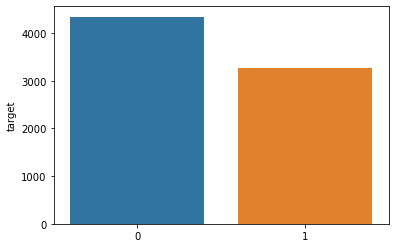

In [88]:
sns.barplot(df['target'].value_counts().index,df['target'].value_counts())

## Checking Top 10 keywords in dataset

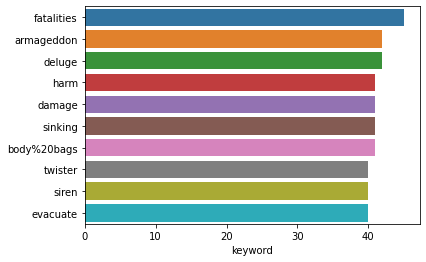

In [89]:
sns.barplot(y=df['keyword'].value_counts()[:10].index,x=df['keyword'].value_counts()[:10])

## Exploring location Variable

In [90]:
df['location'].value_counts().head(20) # checking location value counts

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Washington, DC      21
Kenya               20
Worldwide           19
Chicago, IL         18
Australia           18
California          17
California, USA     15
New York, NY        15
Everywhere          15
San Francisco       14
Name: location, dtype: int64

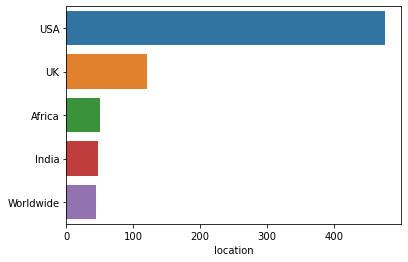

In [91]:
# Replacing the city locations name with it's Country names
df['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "Washington, DC":'USA',
                            "California":'USA',
                            "Chicago, IL":'USA',
                            "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                           "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "England, United Kingdom":'UK',
                            "Mumbai, India":'India',
                            "Mumbai":'India',
                            "Sacramento, CA":'USA',
                            "Melbourne,Victoria":'Australia'},inplace=True)
## Checking tweets from top 5 locations
sns.barplot(y=df['location'].value_counts()[:5].index,x=df['location'].value_counts()[:5])

## Checking Characters in the real and fake tweets

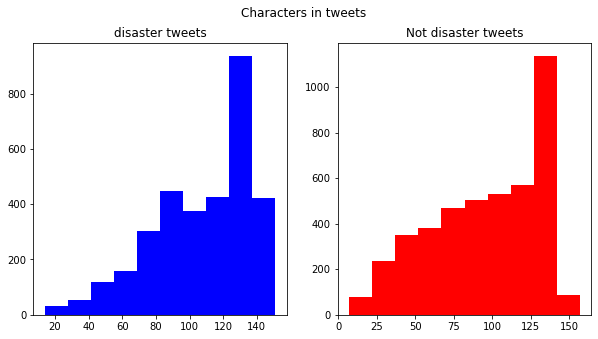

In [92]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=df[df['target']==1]['text'].str.len()
ax1.hist(tweet_len,color='blue')
ax1.set_title('disaster tweets')
tweet_len=df[df['target']==0]['text'].str.len()
ax2.hist(tweet_len,color='red')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in tweets')
plt.show()
## It can seen it is almost similar

## Creating Wordcloud for real and fake tweets to see which words are used most . 

In [93]:
## Sepearting real and fake tweets
disaster_tweets=df[df['target']==1]['text']
nondisaster_tweets=df[df['target']==0]['text']

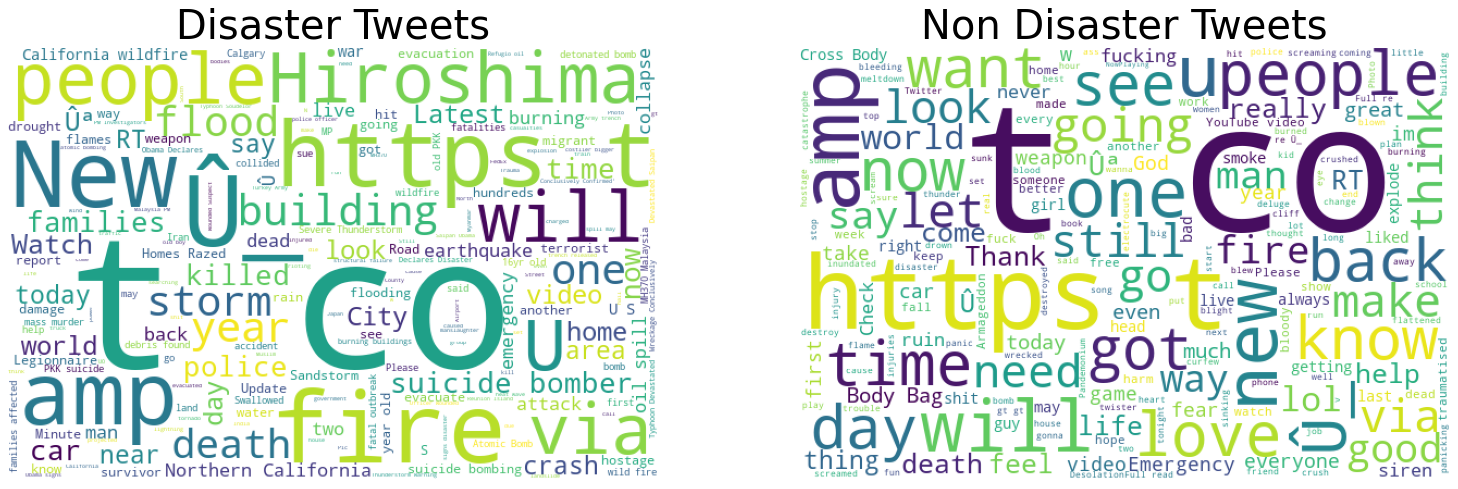

In [94]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(nondisaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

## Splitting data into train and test for text cleaning

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = df[["id", "keyword", "location", "text"]] # Features
y = df[["id","target"]] #Labels

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 48)
#splitting the data into 80%/20%, with random state 48
y_train = y_train['target']
y_test = y_test['target']
print("Training Data", len(y_train))
print("Testing Data", len(y_test))

Training Data 6090
Testing Data 1523


## Removing url from tweets

In [98]:
def Remove_Url(string):
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%|\-)*\b', '', string)

In [99]:
print("Example of text with URL: \n", X_train.iloc[1,3], end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_Url)
print("Example of text without URL: \n", X_train.iloc[1,3])

Example of text with URL: 
 Your Router is One of the Latest DDoS Attack Weapons http://t.co/vXxMvgtzvg #phone #gaming #tv #news

Example of text without URL: 
 Your Router is One of the Latest DDoS Attack Weapons  #phone #gaming #tv #news


<ipython-input-99-506b9cd50c24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['text'] = X_train['text'].apply(Remove_Url)


## Removing all the tags like '#','@' from the tweets

In [100]:
def Handle_Tags(string):
    pattern = re.compile(r'[@|#][^\s]+')## storing all tags in pattern variable
    matches = pattern.findall(string) ## finding pattern 's content in tweet
    tags = [match[1:] for match in matches]
    # Removing tags from main string
    string = re.sub(pattern, '', string)
    # More weightage to tag by adding them 3 times
    return string + ' ' + ' '.join(tags) + ' '+ ' '.join(tags) + ' ' + ' '.join(tags)

In [101]:
print("Example of text without Handling Tags: \n", X_train.iloc[1,3],end = "\n\n")
X_train['text'] = X_train['text'].apply(Handle_Tags)
print("Example of text with Handling Tags: \n", X_train.iloc[1,3])

Example of text without Handling Tags: 
 Your Router is One of the Latest DDoS Attack Weapons  #phone #gaming #tv #news

Example of text with Handling Tags: 
 Your Router is One of the Latest DDoS Attack Weapons      phone gaming tv news phone gaming tv news phone gaming tv news


<ipython-input-101-655d4573df4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['text'] = X_train['text'].apply(Handle_Tags)


## Removing emoticons from tweets using special library demoji

In [102]:
def Handle_emoji(string):
    return demoji.replace_with_desc(string)

In [103]:
print("Example of text without Handled Emojis: \n", X_train.iloc[1,3],end = "\n\n")
X_train['text'] = X['text'].apply(Handle_emoji)
print("Example of text with Handled Emoji: \n", X_train.iloc[1,3])

Example of text without Handled Emojis: 
 Your Router is One of the Latest DDoS Attack Weapons      phone gaming tv news phone gaming tv news phone gaming tv news

Example of text with Handled Emoji: 
 Your Router is One of the Latest DDoS Attack Weapons http://t.co/vXxMvgtzvg #phone #gaming #tv #news


<ipython-input-103-001cad280ef4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['text'] = X['text'].apply(Handle_emoji)


## Removing Html tags from tweets

In [104]:
def Remove_html(string):
    return re.sub(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});', '', str(string))

In [105]:
X_train['text'] = X_train['text'].apply(Remove_html)

<ipython-input-105-a56a412b03e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['text'] = X_train['text'].apply(Remove_html)


## Applying Stemming technique to get a clear meaning of word

In [106]:
stemmer  = SnowballStemmer('english')
stopword = stopwords.words('english')

def Remove_StopAndStem(string):
    string_list = string.split()
    return ' '.join([stemmer.stem(i) for i in string_list if i not in stopword])

In [107]:
print("Example of text before Removing Stopwords: \n", X.iloc[1,3],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_StopAndStem)
print("Example of text after Removing Stopwords and Stemming: \n", X_train.iloc[1,3])

Example of text before Removing Stopwords: 
 Forest fire near La Ronge Sask. Canada

Example of text after Removing Stopwords and Stemming: 
 your router one latest ddos attack weapon http://t.co/vxxmvgtzvg #phone #game #tv #new


<ipython-input-107-ac4288075b06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['text'] = X_train['text'].apply(Remove_StopAndStem)


## Removing unnecessary characters from tweets and also words which are of no use

In [108]:
def Remove_UC(string):
    thestring = re.sub(r'[^a-zA-Z\s]','', string) # remove word of length less than 2
    thestring = re.sub(r'\b\w{1,2}\b', '', thestring)
    thestring =  re.sub('via|new|people|today|one', '', thestring)
    return re.sub(' +', ' ', thestring)

In [109]:
print("Example of text before Removing Useless Character: \n", X_train.iloc[1,3],end = "\n\n")
X_train['text'] = X_train['text'].apply(Remove_UC)
print("Example of text after Removing Useless Character: \n", X_train.iloc[1,3])

Example of text before Removing Useless Character: 
 your router one latest ddos attack weapon http://t.co/vxxmvgtzvg #phone #game #tv #new

Example of text after Removing Useless Character: 
 your router latest ddos attack weapon httptcovxxmvgtzvg ph game 


<ipython-input-109-e41076c575f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['text'] = X_train['text'].apply(Remove_UC)


## Creating function for advanced cleaning and joining keywords,location and tweet into one sentence

In [111]:
def merging_details(data):
        df_list = []
        for row in data.itertuples(): ## iterate over single row in dataframe
            df_dict = {}
            keyword = re.sub(r'[^a-zA-Z\s]','', str(row[2]))## in keyword check for all non letter words and replace with space
            location = re.sub(r'[^a-zA-Z\s]','', str(row[3]))## in location check for all non letter words and replace with space
            keyword = re.sub(r'\b\w{1,2}\b', '', keyword) ## Replace words with 2 letters with space
            location = re.sub(r'\b\w{1,2}\b', '', location)
            text = str(row[4])

            if keyword == 'nan':
                if location == 'nan':             
                    prs_data = text           ## if keyword is missing and location is missing pass only tweet 
                else:
                    prs_data = location + ' ' + text ## if only keyword is missing pass location and tweet
            else:
                if location == 'nan':    
                    prs_data = keyword + ' ' + text ## if location is missing pass keyword and tweet
                else:
                    prs_data = keyword + ' ' + location + ' ' + text          ## if nothing is missing pass everything      
            
            prs_data = re.sub(' +', ' ', prs_data) ## replace '+' with a space
            
            df_dict['Cleaned_data'] = prs_data
            
            df_list.append(df_dict)
                 
        return pd.DataFrame(df_list) ## return dataframe of the processed data

In [112]:
X_train = merging_details(X_train) ## applying function on train data

In [113]:
X_train['target']=y_train

In [114]:
X_train.head(5)

,Cleaned_data,target
0,nuclearreactor Norwalk has ancient nuclear rea...,1.0
1,weapons your router latest ddos attack weapon ...,NaN
2,obliterate holymileyray mooniighthunti focus o...,NaN
3,emergency Michigan whistleblow lawsuit accus s...,1.0
4,chemicalemergency Seattle Washington downtown ...,1.0


## Preprocessing for test data same as done for train data

In [115]:
# Step 1. Remove Url
X_test['text'] = X_test['text'].apply(Remove_Url)
# Step 2. Handle Tags
X_test['text'] = X_test['text'].apply(Handle_Tags)
# Step 3. Handle emoji's
X_test['text'] = X_test['text'].apply(Handle_emoji)
# Step 4. Remove HTML Tags
X_test['text'] = X_test['text'].apply(Remove_html)
# Step 5. Remove Stopwords and Stemming
X_test['text'] = X_test['text'].apply(Remove_StopAndStem)
# Step 6. Removing Useless Characters
X_test['text'] = X_test['text'].apply(Remove_UC)
# Step7. Merging Other Details
X_test = merging_details(X_test)

<ipython-input-115-80ebe183792c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['text'] = X_test['text'].apply(Remove_Url)
<ipython-input-115-80ebe183792c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['text'] = X_test['text'].apply(Handle_Tags)
<ipython-input-115-80ebe183792c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [116]:
X_test

,Cleaned_data
0,blight Laventillemoorings dotish blight car ri...
1,mudslide Tring pretti marchol nennicook aitchk...
2,emergencyplan MPP when bodi like fuck sleep sa...
3,lava Indonesia lava blast power red youngheroe...
4,rescued Worldwide migrant rescu after boat cap...
...,...
1518,damage Bhopal Madhya Pradesh India standard da...
1519,meltdown Flushing Queens lol warthen midst bul...
1520,panic Torry Alvarez love forever panic disco amo
1521,quarantine reddit updat content polici promis ...


In [117]:
X_test['target']=y_test

## Merge data to see the wordcloud after cleaning data

In [118]:
clean_df=X_train.append(X_test, ignore_index = True)
clean_df.shape

(7613, 2)

In [119]:
clean_disaster_tweets=clean_df[clean_df['target']==1]['Cleaned_data']
clean_nondisaster_tweets=clean_df[clean_df['target']==0]['Cleaned_data']

## See Wordcloud after cleaning of tweets

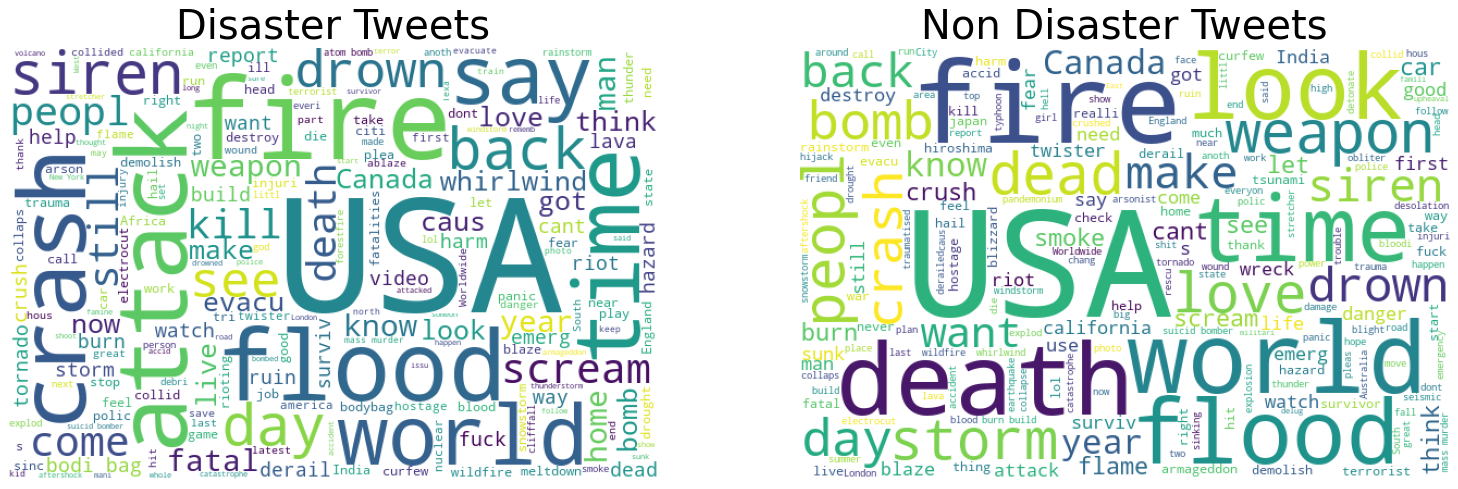

In [120]:
from wordcloud import WordCloud
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(clean_disaster_tweets))
ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);

wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(clean_nondisaster_tweets))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);

## Vectorizing data to make it ready as input to model

In [121]:
%%time
vectorizer = TfidfVectorizer(min_df = 0.0005,max_features = 100000,tokenizer = lambda x: x.split(),ngram_range = (1,4))

X_train = vectorizer.fit_transform(X_train['Cleaned_data'])
X_test = vectorizer.transform(X_test['Cleaned_data'])

Wall time: 430 ms


In [122]:
print("Training Points: ", len(X_train.toarray()),"| Training Features:" , len(X_train.toarray()[0]))
print("Testing Points: ", len(X_test.toarray()),"| Testing Features:" , len(X_test.toarray()[0]))
print()
print("Training Points: ", len(y_train))
print("Testing Points: ", len(y_test))

Training Points:  6090 | Training Features: 5483
Testing Points:  1523 | Testing Features: 5483

Training Points:  6090
Testing Points:  1523


## Build model And Check for Roc AUC score

In [125]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR()
grid_kn = GridSearchCV(estimator = svr,
                        scoring = 'roc_auc', 
                        cv = 10, 
                        verbose = 1,
                        n_jobs = -1)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('ROC AUC score:',roc_auc_score(y_test,y_pred))

ROC AUC score: 0.863095238095238


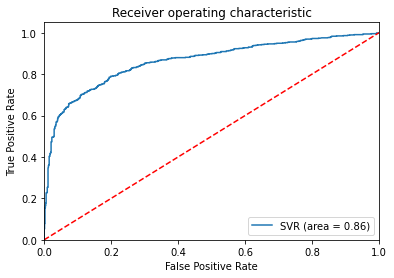

In [124]:
## Ploting Roc Auc graph
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr, tpr, label='SVR (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()